In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from collections import Counter
import re

# NumPy

**Задача 1**\
Сгенерировать массив из случайных положительных чисел произвольной длины. Вывести элементы, которые больше среднего арифметического.

In [2]:
arr1 = np.random.rand(np.random.randint(0, 100)) * 100 #от 0 до 100
mean_arr1 = np.mean(arr1)
greater = arr1[arr1 > mean_arr1]
print(f'среднее арифметическое {mean_arr1}, элементы: {greater}')

среднее арифметическое 50.951926854061206, элементы: [63.33930466 51.73301988 92.6293446  89.85825486 90.14133239 55.48775009
 62.64507634 77.17137202 78.16434034 90.4015381  94.77232422 89.74270619
 79.60122151 69.1682181  60.80055895 66.80386218 63.77563728 54.3588307
 75.37140039 86.36440205 84.95351534 62.62674302 68.06803503 56.89888243
 60.33675204 92.92800817 65.62245246 92.83704331 65.201887   93.5651813
 72.21679473 70.6326687  68.74462731 92.06844414 60.229737   90.94495307
 67.74608882 98.04334805 64.06419271 59.30994194 76.26003851 71.08957064
 54.03691736 99.2227167  67.51948893 94.54586913 88.0242142  80.31058739
 84.62075392]


**Задача 2**\
Сгенерировать массив из 20 случайных элементов, элементы которого лежат в интервале [0, 10].
+ Определить количество элементов, отличающихся от минимального на 5.
+ Найти среднее арифметическое всех четных элементов массива, стоящих на нечетных местах.

In [3]:
arr2 = np.random.randint(0, 11, 20)
arr2

array([7, 5, 0, 5, 8, 9, 1, 8, 1, 7, 5, 2, 8, 8, 1, 0, 1, 5, 1, 4])

In [4]:
#Определить количество элементов, отличающихся от минимального на 5.
min_el = np.min(arr2)
count = np.sum(np.abs(arr2 - min_el) == 5)
count

4

In [5]:
#Найти среднее арифметическое всех четных элементов массива, стоящих на нечетных местах.
odd = arr2[1::2] #нечетные места
even_el = odd[odd % 2 == 0] #четные элементы
mean_even = np.mean(even_el) 
mean_even

4.4

**Задача 3**\
Сгенерировать матрицу A размером 5 на 5, элементы которой лежат в интервале [1, 10].
+ Возвести в квадрат максимальный элемент матрицы.
+ Все четные числа заменить на 0.

In [6]:
A = np.random.randint(0, 11, (5, 5))
A

array([[3, 3, 3, 2, 7],
       [6, 0, 4, 0, 2],
       [1, 1, 8, 7, 9],
       [1, 7, 7, 7, 1],
       [0, 1, 1, 5, 5]])

In [7]:
#Возвести в квадрат максимальный элемент матрицы.
max_el = np.max(A)
A[A == max_el] = max_el ** 2

In [8]:
#Все четные числа заменить на 0.
A[A % 2 == 0] = 0
A

array([[ 3,  3,  3,  0,  7],
       [ 0,  0,  0,  0,  0],
       [ 1,  1,  0,  7, 81],
       [ 1,  7,  7,  7,  1],
       [ 0,  1,  1,  5,  5]])

**Задача 4**\
Сгенерировать матрицу B размером 5 на 5, элементы которой лежат в интервале [-5, 5]. Отрицательные элементы матрицы заменить на число отрицательных элементов в строке, в которой они находятся.

In [9]:
B = np.random.randint(-5, 5, (5, 5))
B

array([[-1,  3, -1,  1, -1],
       [ 2, -3,  4,  2, -3],
       [ 1,  2,  1, -1,  4],
       [ 2,  3, -3,  4, -1],
       [-2,  1, -5,  4, -3]])

In [10]:
for i in range(B.shape[0]):
    count = np.sum(B[i] < 0)
    B[i][B[i] < 0] = count
B

array([[3, 3, 3, 1, 3],
       [2, 2, 4, 2, 2],
       [1, 2, 1, 1, 4],
       [2, 3, 2, 4, 2],
       [3, 1, 3, 4, 3]])

# Pandas
**Познакомимся с данными**

In [11]:
df = pd.read_csv("https://raw.githubusercontent.com/rolandmueller/titanic/main/titanic3.csv")

In [12]:
df.head(1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"


In [13]:
df.describe(include='all') #посмотрим на описательную статистику

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,27,NaN,369
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64
mean,2.294882,0.381971,NaN,NaN,29.881135,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN
std,0.837836,0.486055,NaN,NaN,14.413500,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN
min,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


**Предобработка**

In [15]:
#посмотрим на пропуски
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

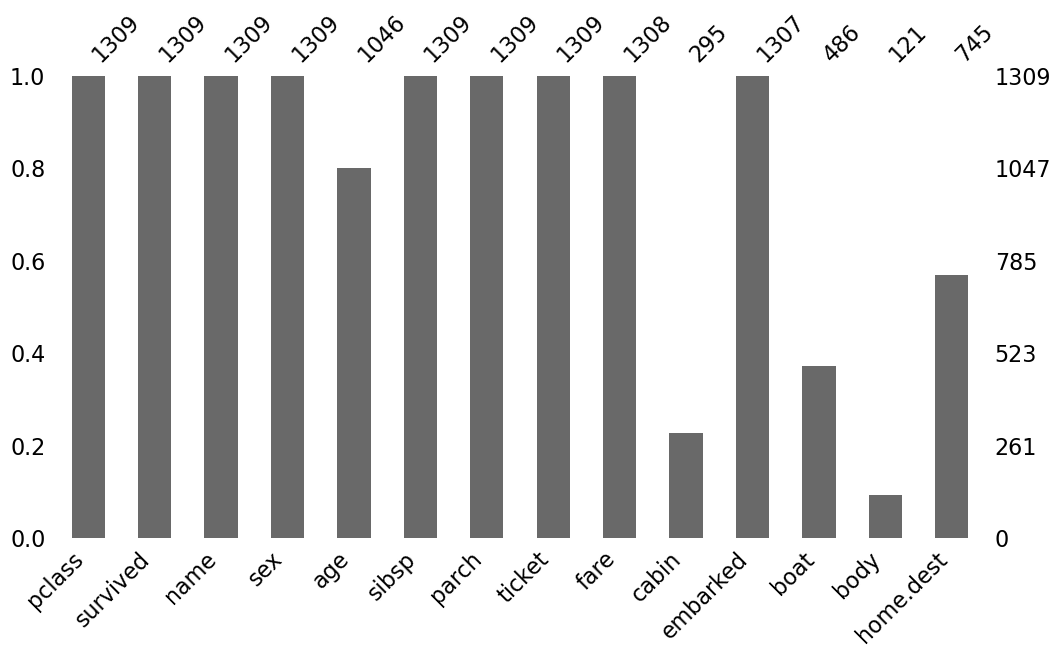

In [16]:
#добавим визуализацию пропущенных значений 
msno.bar(df, figsize=(12, 6))
plt.show()

Вроде бы для заданий 1-6 нужно будет информация только о возрасте, цене* билета (рассматриваем только те столбцы, в которых есть пропуски), поэтому **обработкой пропущенных значений заниматься не будем**
<br>

*в fare 1 пропуск, который не повлияет на результат

**Задание 1**
+ Какой была максимальная цена билета? Медиана?
+ Какова доля выживших?
+ Сколько мужчин / женщин находилось на борту?

In [17]:
# Какой была максимальная цена билета? Медиана?
max_price = df['fare'].max()
median_price = df['fare'].median()
print(f'Максимальная цена билета: {max_price}, медиана: {median_price}')

Максимальная цена билета: 512.3292, медиана: 14.4542


In [18]:
# Какова доля выживших?
survived = df['survived'].sum() / df['survived'].count()
print(f'Доля выживщих составляет {round(survived, 2)} ')

Доля выживщих составляет 0.38 


In [19]:
# Сколько мужчин / женщин находилось на борту?
df['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

**Задание 2**
+ Выведите распределение переменной __pclass__ для мужчин и женщин.
    + Сколько мужчин было в первом классе?
    + Сколько женщин было в третьем классе?
      
+ Создайте новый признак __age_group__, который равен:
    + 1, если пассажир был моложе 30 лет;
    + 2, если пассажиру было от 30 до 60 лет;
    + 3, если пассажир был старше 60 лет.

In [20]:
# Выведите распределение переменной pclass для мужчин и женщин.
grouped = df.groupby(['pclass','sex']).size().unstack()
grouped

sex,female,male
pclass,,
1,144,179
2,106,171
3,216,493


In [21]:
# Создайте новый признак age_group
df['age_group'] = pd.cut(df['age'], 
                         bins=[-float('inf'), 30, 60, float('inf')], 
                        labels=[1, 2, 3])
df.head(1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_group
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1


**Задание 3**\
Найдите самое популярное имя среди пассажиров:
+ мужчин;
+ женщин.
<br>

Воспользуемся модулем **re** для поиска и замены в строках, а также **counter.most_common** - список наиболее распространенных элементов 

In [36]:
#для женщин
female_names = df.query('sex == "female"')['name']
all_names = ' '.join(female_names) #объединяем в одну строчку
#разбиваем на слова  и убираем небуквенные элементы
words = re.findall(r'\b\w+\b', all_names) 
Counter(words).most_common(3)

[('Miss', 260), ('Mrs', 201), ('Mary', 30)]

In [37]:
#для мужчин
male_names = df.query('sex == "male"')['name']
all_names = ' '.join(male_names) 
words = re.findall(r'\b\w+\b', all_names) 
Counter(words).most_common(3)

[('Mr', 763), ('William', 68), ('Master', 61)]

**Задание 4**
+ Выведите данные о всех пассажирах, которые сели в Cherbourg (Embarked='C') и были старше 50 лет.
+ Выведите данные о всех женщинах младше 20 и старше 50 лет.
+ Сколько пассажиров старше 70 лет было на борту?

In [24]:
# Выведите данные о всех пассажирах, которые сели в Cherbourg (Embarked='C') и были старше 50 лет.
df.query('embarked == "C" and age > 50').head(1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_group
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",3


In [25]:
# Выведите данные о всех женщинах младше 20 и старше 50 лет.
df.query('sex == "female" and (age < 20 or age > 50)').head(1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_group
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [26]:
# Сколько пассажиров старше 70 лет было на борту?
above_70 = df.query('age > 70').shape[0]
print(f'На борту {above_70} пассажиров старше 70')

На борту 6 пассажиров старше 70


**Задание 5**
+ Посчитайте средний возраст среди мужчин и среди женщин.
+ Посчитайте доли выживших в различных возрастных группах (новый признак **AgeGroup**).
+ Найдите максимальную стоимость билета в каждом из ценовых классов.

In [27]:
#1 Посчитайте средний возраст среди мужчин и среди женщин.
df.groupby('sex')['age'].mean()

sex
female    28.687071
male      30.585233
Name: age, dtype: float64

In [28]:
#2 Посчитайте доли выживших в различных возрастных группах (новый признак AgeGroup).
df.groupby('age_group')['survived'].mean()

age_group
1    0.407225
2    0.423267
3    0.242424
Name: survived, dtype: float64

In [29]:
#3 Найдите максимальную стоимость билета в каждом из ценовых классов.
df.groupby('pclass')['fare'].max()

pclass
1    512.3292
2     73.5000
3     69.5500
Name: fare, dtype: float64

**Задание 6**\
Ответьте на предыдущие вопросы с помощью функции crosstab и метода pivot_table.

**crosstab**

In [30]:
#1 Посчитайте средний возраст среди мужчин и среди женщин.
pd.crosstab(index=df['sex'], columns=df['sex'], values=df['age'], aggfunc='mean')

sex,female,male
sex,,
female,28.687071,NaN
male,NaN,30.585233


In [31]:
#2 Посчитайте доли выживших в различных возрастных группах (новый признак AgeGroup).
pd.crosstab(index=df['age_group'], columns=df['age_group'], values=df['survived'], aggfunc='mean')

age_group,1,2,3
age_group,,,
1,0.407225,NaN,NaN
2,NaN,0.423267,NaN
3,NaN,NaN,0.242424


In [32]:
#3 Найдите максимальную стоимость билета в каждом из ценовых классов.
pd.crosstab(index=df['pclass'], columns=df['pclass'], values=df['fare'], aggfunc='max')

pclass,1,2,3
pclass,,,
1,512.3292,NaN,NaN
2,NaN,73.5,NaN
3,NaN,NaN,69.55


**pivot_table**

In [33]:
#1 Посчитайте средний возраст среди мужчин и среди женщин.
df.pivot_table(values='age', index='sex', aggfunc='mean')

,age
sex,
female,28.687071
male,30.585233


In [34]:
#2 Посчитайте доли выживших в различных возрастных группах (новый признак AgeGroup).
df.pivot_table(values='survived', index='age_group', aggfunc='mean')

,survived
age_group,
1,0.407225
2,0.423267
3,0.242424


In [35]:
#3 Найдите максимальную стоимость билета в каждом из ценовых классов.
df.pivot_table(values='fare', index='pclass', aggfunc='max')

,fare
pclass,
1,512.3292
2,73.5000
3,69.5500
